<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [4]:
!pip install pandas
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 169.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 168.6 MB/s eta 0:00:00


In [5]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 162.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 142.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 141.1 MB/s eta 0:00:00


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [6]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-09-25 13:32:06--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  57.6MB/s    in 2.6s    

2025-09-25 13:32:09 (57.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [8]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [9]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



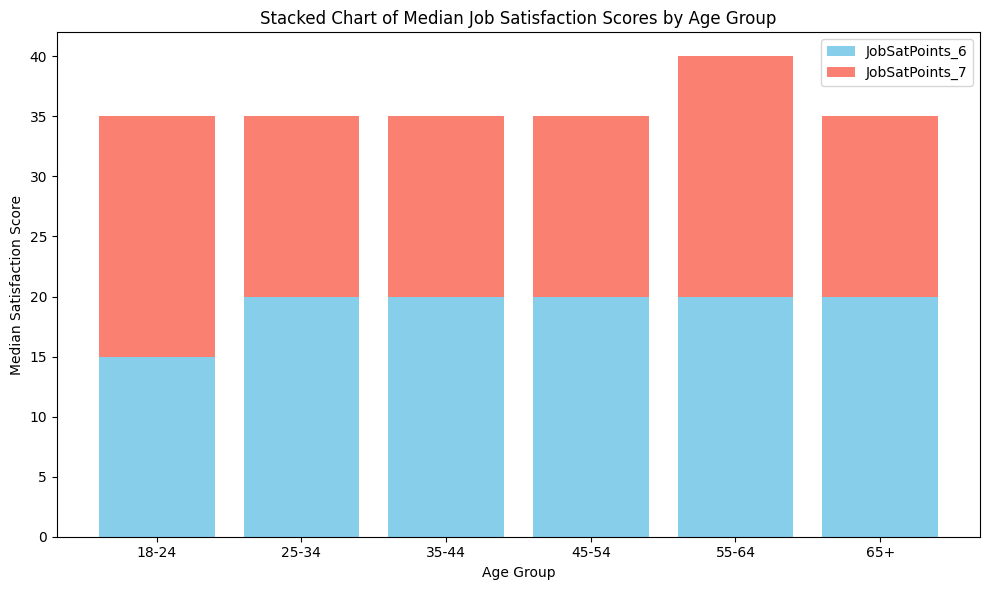

In [10]:
##Write your code here
import sqlite3
# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite') 

# step 2: Query relevant columns
query = 'SELECT Age, JobSatPoints_6, JobSatPoints_7 FROM main'
df = pd.read_sql_query(query, conn)

# Step 3: Map Age ranges to simplified groups
age_map = {
    "Under 18 years old": None,
    "18-24 years old": "18-24",
    "25-34 years old": "25-34",
    "35-44 years old": "35-44",
    "45-54 years old": "45-54",
    "55-64 years old": "55-64",
    "65 years or older": "65+"
}
df['AgeGroup'] = df['Age'].map(age_map)
df.dropna(subset=['AgeGroup'], inplace=True)

# Step 4: Group by AgeGroup and calculate medians
grouped = df.groupby('AgeGroup').agg({
    'JobSatPoints_6': 'median',
    'JobSatPoints_7': 'median'
}).reset_index()

# Step 5: Create stacked bar chart
plt.figure(figsize=(10, 6))
bar1 = plt.bar(grouped['AgeGroup'], grouped['JobSatPoints_6'], label='JobSatPoints_6', color='skyblue')
bar2 = plt.bar(grouped['AgeGroup'], grouped['JobSatPoints_7'], bottom=grouped['JobSatPoints_6'], label='JobSatPoints_7', color='salmon')

# Step 6: Final formatting
plt.title('Stacked Chart of Median Job Satisfaction Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Score')
plt.legend()
plt.tight_layout()
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


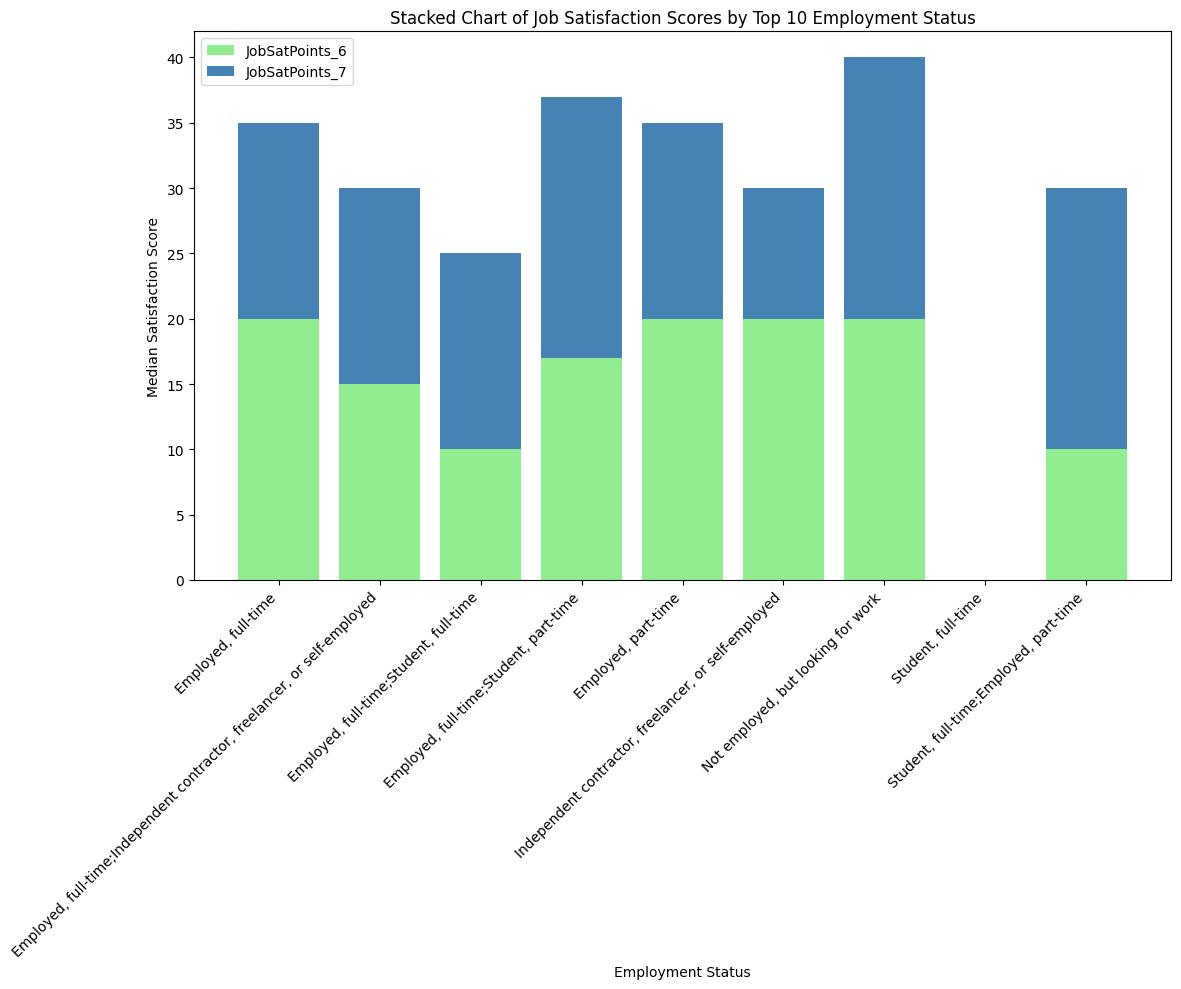

In [11]:
##Write your code here
#Query relevant columns
query = 'SELECT Employment, JobSatPoints_6, JobSatPoints_7 FROM main'
df = pd.read_sql_query(query, conn)

# Filter top 10 employment statuses by frequency
top_employment = df['Employment'].value_counts().nlargest(10).index
df_top = df[df['Employment'].isin(top_employment)]

# Group by Employment status and calculate median satisfaction scores
grouped = df_top.groupby('Employment').agg({
    'JobSatPoints_6': 'median',
    'JobSatPoints_7': 'median'
}).reset_index()

# Create stacked bar chart
plt.figure(figsize=(12, 10))
bar1 = plt.bar(grouped['Employment'], grouped['JobSatPoints_6'], label='JobSatPoints_6', color='lightgreen')
bar2 = plt.bar(grouped['Employment'], grouped['JobSatPoints_7'], bottom=grouped['JobSatPoints_6'], label='JobSatPoints_7', color='steelblue')

# Final formatting
plt.title('Stacked Chart of Job Satisfaction Scores by Top 10 Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Median Satisfaction Score')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


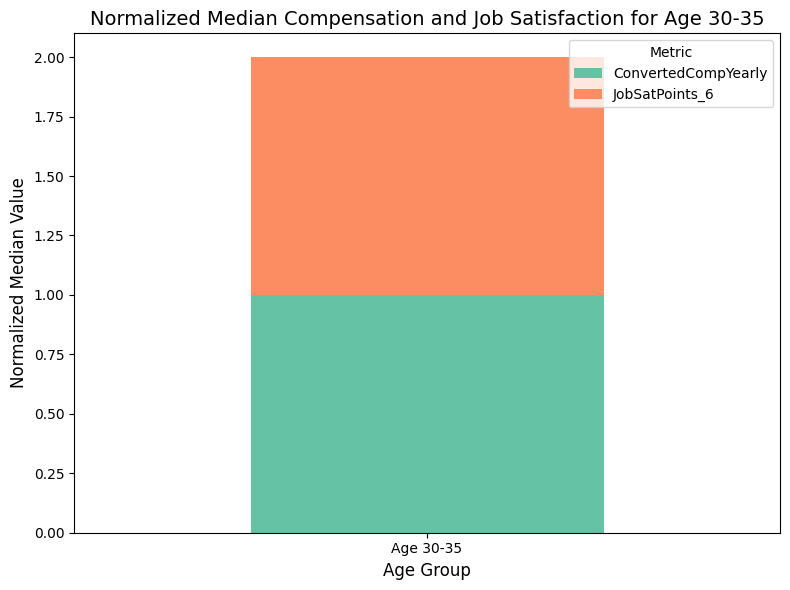

In [12]:
##Write your code here
# Query relevant columns
query = 'SELECT Age, ConvertedCompYearly, JobSatPoints_6 FROM main'
df = pd.read_sql_query(query, conn)

df = df.dropna(subset=["Age", "ConvertedCompYearly", "JobSatPoints_6"])

age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

df_filtered = df[(df['AgeNumeric'] >= 25) & (df['AgeNumeric'] <= 34)]

median_values = df_filtered[["ConvertedCompYearly", "JobSatPoints_6"]].median().to_frame().T
median_values.index = ["Age 30-35"]

median_norm = median_values.copy()
median_norm['ConvertedCompYearly'] = median_norm['ConvertedCompYearly'] / median_norm['ConvertedCompYearly'].max()
median_norm['JobSatPoints_6'] = median_norm['JobSatPoints_6'] / median_norm['JobSatPoints_6'].max()

median_norm.plot(
    kind="bar",
    stacked=True,
    figsize=(8, 6),
    color=["#66c2a5", "#fc8d62"]
)
plt.title("Normalized Median Compensation and Job Satisfaction for Age 30-35", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Normalized Median Value", fontsize=12)
plt.xticks(rotation=0)
plt.legend(["ConvertedCompYearly", "JobSatPoints_6"], title="Metric")
plt.tight_layout()
plt.show()


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


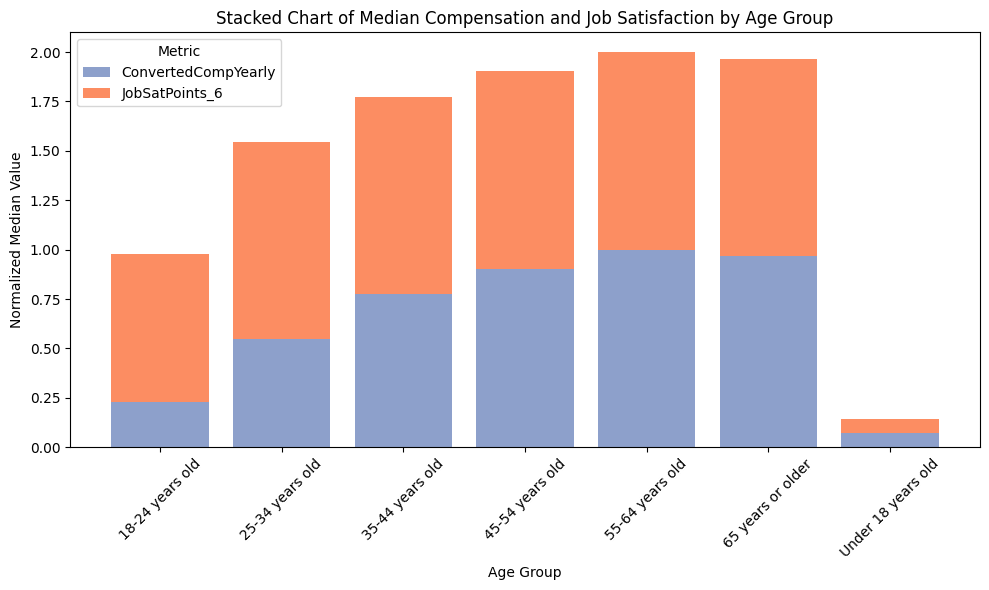

In [13]:
##Write your code here

# Step 2: Query relevant columns
query = 'SELECT Age, ConvertedCompYearly, JobSatPoints_6 FROM main'
df = pd.read_sql_query(query, conn)

# Step 3: Map Age ranges to numeric midpoints
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
df['AgeNumeric'] = df['Age'].map(age_mapping)
df.dropna(subset=['AgeNumeric'], inplace=True)

# Step 4: Group by Age and calculate median values
grouped = df.groupby('Age').agg({
    'ConvertedCompYearly': 'median',
    'JobSatPoints_6': 'median'
}).reset_index()

# Step 5: Normalize values for visual comparison
grouped_norm = grouped.copy()
grouped_norm['ConvertedCompYearly'] = grouped_norm['ConvertedCompYearly'] / grouped_norm['ConvertedCompYearly'].max()
grouped_norm['JobSatPoints_6'] = grouped_norm['JobSatPoints_6'] / grouped_norm['JobSatPoints_6'].max()

# Step 6: Create stacked bar chart
plt.figure(figsize=(10, 6))
bar1 = plt.bar(grouped_norm['Age'], grouped_norm['ConvertedCompYearly'], label='ConvertedCompYearly', color='#8da0cb')
bar2 = plt.bar(grouped_norm['Age'], grouped_norm['JobSatPoints_6'], bottom=grouped_norm['ConvertedCompYearly'], label='JobSatPoints_6', color='#fc8d62')

# Step 7: Final formatting
plt.title('Stacked Chart of Median Compensation and Job Satisfaction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Normalized Median Value')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


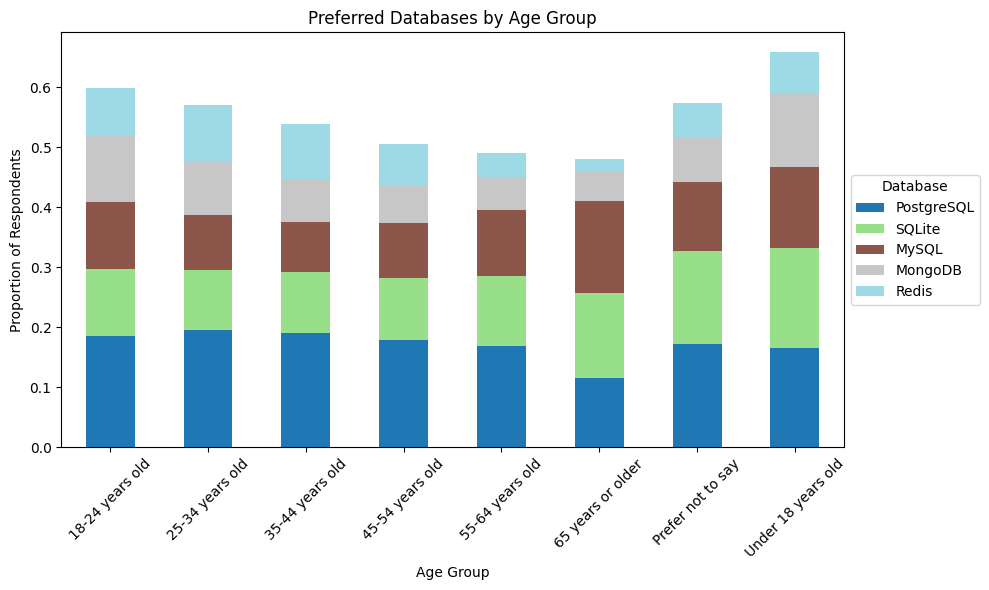

In [14]:
##Write your code here

#Query relevant columns
query = 'SELECT Age, DatabaseWantToWorkWith FROM main'
df = pd.read_sql_query(query, conn)

# Step 3: Split multiple databases into separate rows
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].str.split(';')
df_exploded = df.explode('DatabaseWantToWorkWith')

# Step 4: Count preferences by age group and database
grouped = df_exploded.groupby(['Age', 'DatabaseWantToWorkWith']).size().unstack(fill_value=0)

# Step 5: Normalize to proportions
grouped_prop = grouped.div(grouped.sum(axis=1), axis=0)

# Step 6: Select top 5 databases overall
top_databases = df_exploded['DatabaseWantToWorkWith'].value_counts().nlargest(5).index
grouped_top = grouped_prop[top_databases]

# Step 7: Create stacked bar chart
grouped_top.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='tab20'
)

# Step 8: Final formatting
plt.title('Preferred Databases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Database',loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()




##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


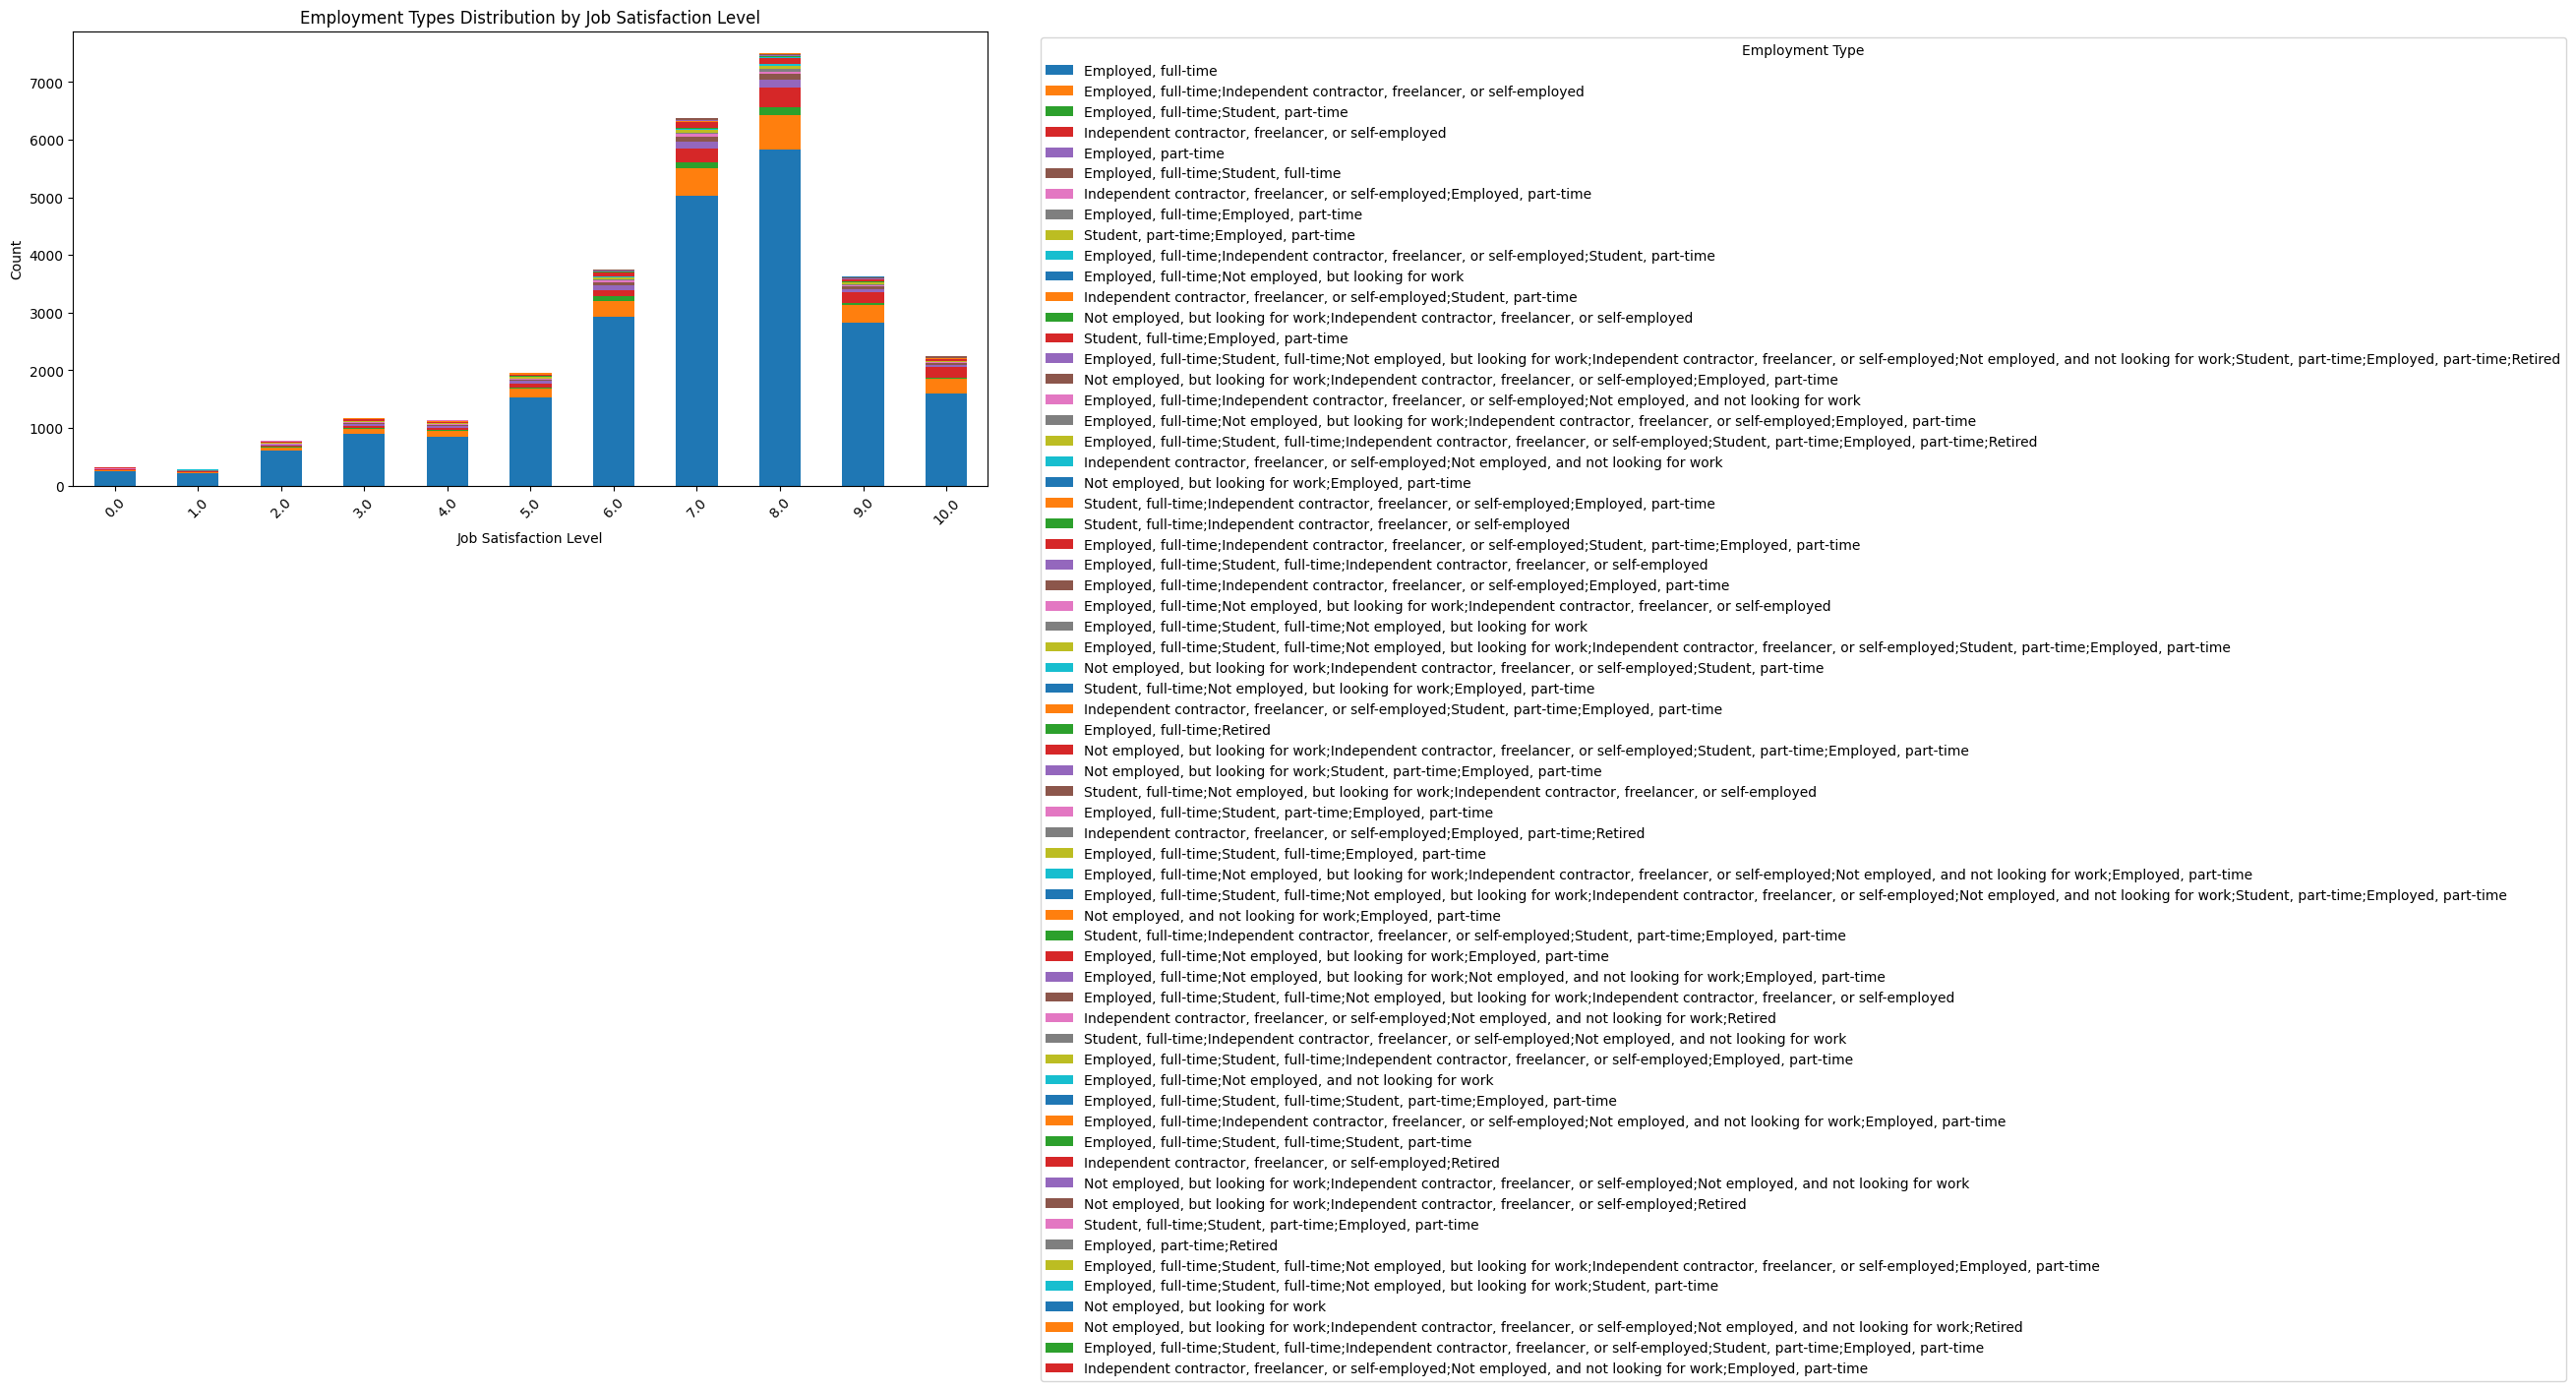

In [15]:
##Write your code here

# Step 1: Query relevant columns
query = 'SELECT Employment, JobSat FROM main'
df = pd.read_sql_query(query, conn)


emp_sat = df.groupby("JobSat")["Employment"].value_counts().unstack().fillna(0)

emp_sat.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Employment Types Distribution by Job Satisfaction Level")
plt.ylabel("Count")
plt.xlabel("Job Satisfaction Level")
plt.xticks(rotation=45)
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


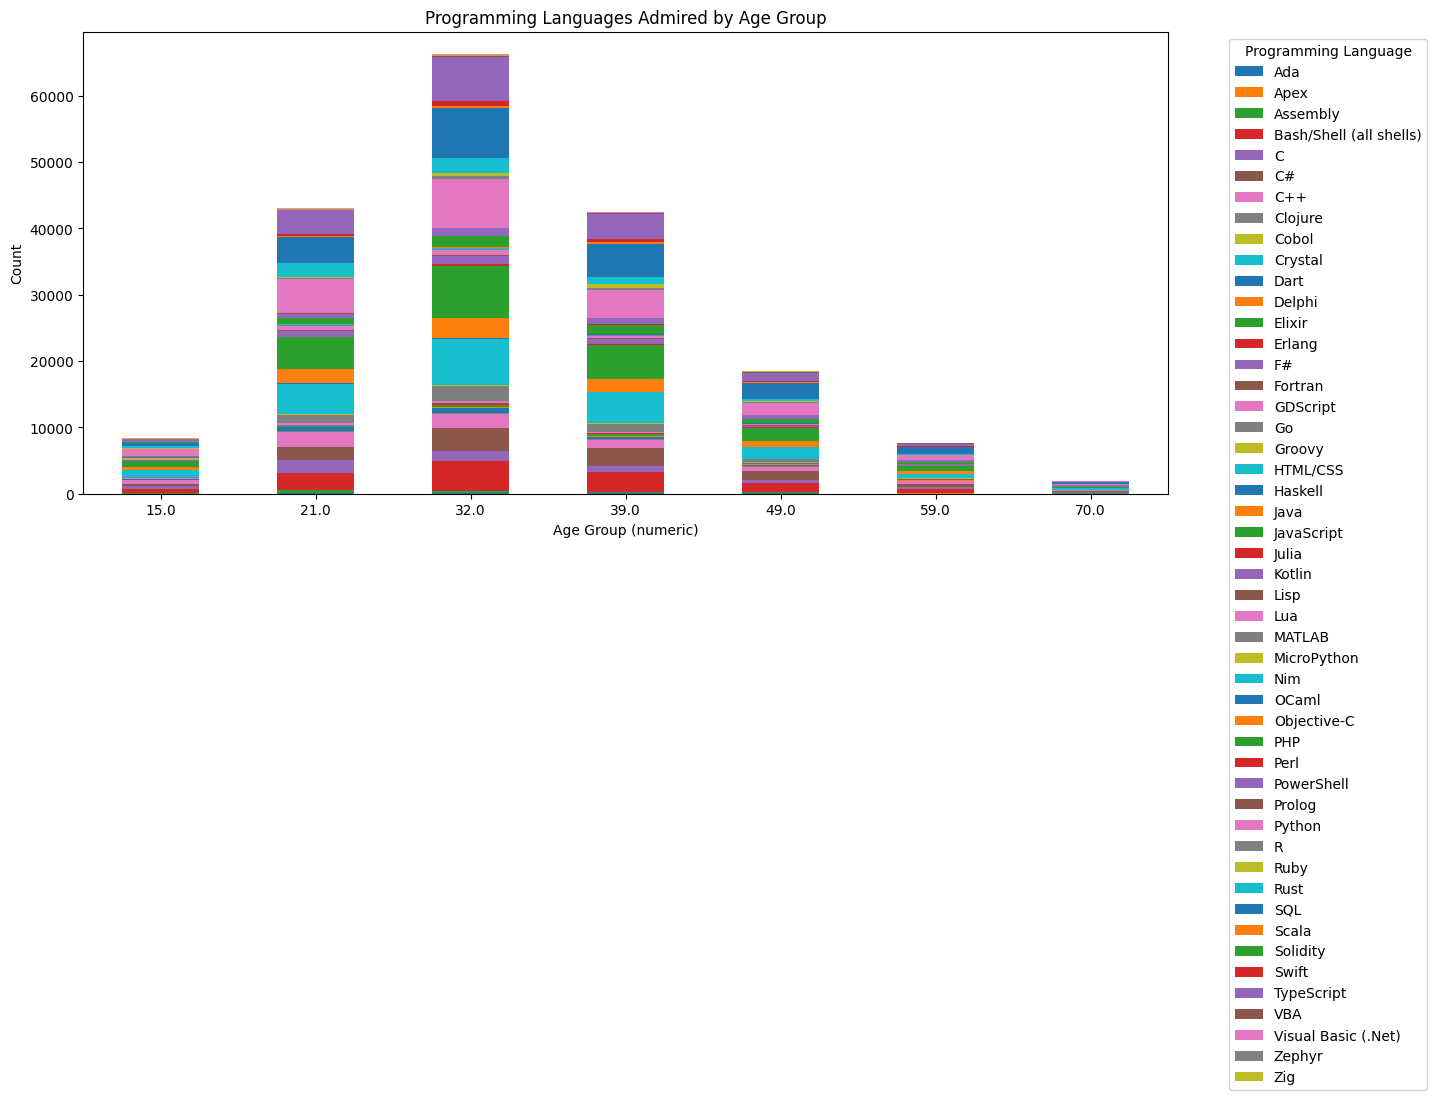

In [16]:
##Write your code here
query = "SELECT Age, LanguageAdmired FROM main"
df = pd.read_sql_query(query, conn)

df = df.dropna(subset=["Age", "LanguageAdmired"])
age_map = {
    "Under 18 years old": 15,
    "18-24 years old": 21,
    "25-34 years old": 32,
    "35-44 years old": 39,
    "45-54 years old": 49,
    "55-64 years old": 59,
    "65 years or older": 70,
}

# Clean Age and map numeric midpoint
df["Age_clean"] = df["Age"].astype(str).str.strip()
df["AgeNumeric"] = df["Age_clean"].map(age_map)

# Split semicolon-separated language lists
lang_exploded = (
    df.dropna(subset=["LanguageAdmired"])
      .assign(LanguageAdmired=df["LanguageAdmired"].str.split(";"))
      .explode("LanguageAdmired")
)

# Count admired languages by age group
lang_age = (
    lang_exploded.groupby("AgeNumeric")["LanguageAdmired"]
    .value_counts()
    .unstack(fill_value=0)
)

# Sort by age
lang_age = lang_age.sort_index()

# Plot stacked bar chart
lang_age.plot(kind="bar", stacked=True, figsize=(14,6))
plt.title("Programming Languages Admired by Age Group")
plt.ylabel("Count")
plt.xlabel("Age Group (numeric)")
plt.xticks(rotation=0)
plt.legend(title="Programming Language", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


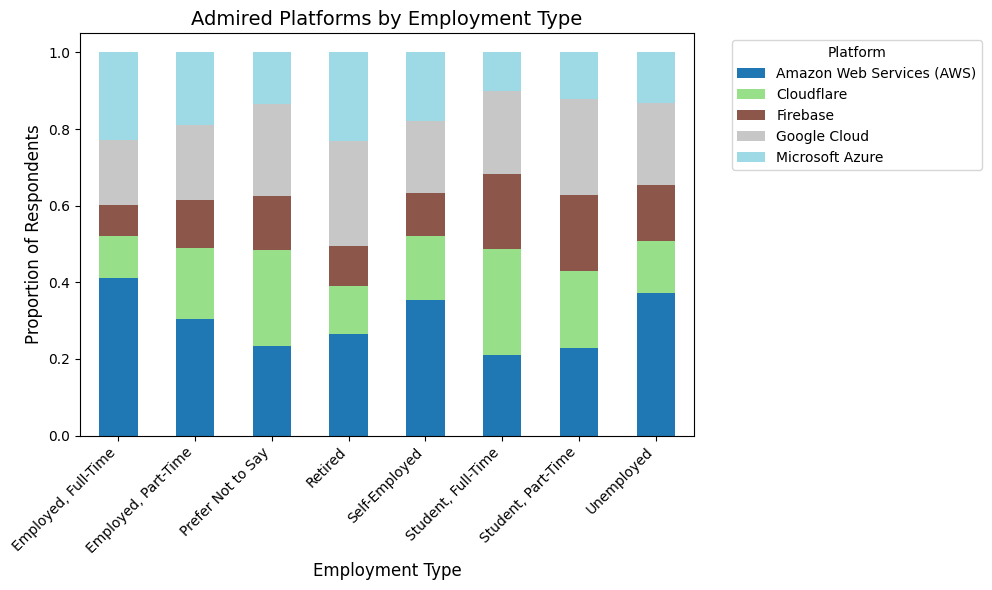

In [17]:
##Write your code here
query = "SELECT Employment, PlatformAdmired FROM main"
df = pd.read_sql_query(query, conn)

df = df.dropna(subset=["Employment", "PlatformAdmired"])

def simplify_employment(value):
    value = value.lower()
    if 'employed, full-time' in value:
        return 'Employed, Full-Time'
    elif 'employed, part-time' in value:
        return 'Employed, Part-Time'
    elif 'student, full-time' in value:
        return 'Student, Full-Time'
    elif 'student, part-time' in value:
        return 'Student, Part-Time'
    elif 'self-employed' in value or 'freelancer' in value:
        return 'Self-Employed'
    elif 'unemployed' in value or 'not employed' in value:
        return 'Unemployed'
    elif 'retired' in value:
        return 'Retired'
    elif 'prefer not' in value:
        return 'Prefer Not to Say'
    else:
        return 'Other'
df["Employment"] = df["Employment"].apply(simplify_employment)

df = df.assign(PlatformAdmired=df['PlatformAdmired'].str.split(';')).explode('PlatformAdmired')

top_platforms = df['PlatformAdmired'].value_counts().nlargest(5).index
df = df[df['PlatformAdmired'].isin(top_platforms)]

platform_counts = df.groupby(["Employment", "PlatformAdmired"]).size().unstack(fill_value=0)
platform_props = platform_counts.div(platform_counts.sum(axis=1), axis=0)

platform_props.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    colormap="tab20"
)
plt.title("Admired Platforms by Employment Type", fontsize=14)
plt.xlabel("Employment Type", fontsize=12)
plt.ylabel("Proportion of Respondents", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [18]:

conn.close()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
